# DAMO-630-29 Assignment 01
prublic repository:  https://github.com/prumucena1979/UNFTERM4
#Group 03:
Oshiro, Renato Hiroyuki
Prumucena, Fabio
Rohit Kumar, Rohit Kumar
Shaikh, Aamena Zakir

#Business Challenge 01

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sdv.metadata import Metadata
from sdv.single_table import GaussianCopulaSynthesizer, CTGANSynthesizer
from sdmetrics.reports.single_table import QualityReport, DiagnosticReport

# TASK I - Exploratory Data Analysis

The EDA offers an initial overview of the dataset by inspecting its structure, detecting missing values or outliers, 
and applying descriptive statistics with visualizations. These insights provide the foundation for subsequent synthetic data generation and evaluation.

In [2]:
# 1.1. load dataset
df = pd.read_csv("Datasets/HealthInsurance.csv")  # file is in the root directory

In [3]:
# 1.2. Shape
print("Shape:", df.shape)

Shape: (8802, 12)


In [4]:
# 1.3. Preview
display(df.head())

,rownames,health,age,limit,gender,insurance,married,selfemp,family,region,ethnicity,education
0,1,yes,31,no,male,yes,yes,yes,4,south,cauc,bachelor
1,2,yes,31,no,female,yes,yes,no,4,south,cauc,highschool
2,3,yes,54,no,male,yes,yes,no,5,west,cauc,ged
3,4,yes,27,no,male,yes,no,no,5,west,cauc,highschool
4,5,yes,39,no,male,yes,yes,no,5,west,cauc,none


In [5]:
# 1.4. Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8802 entries, 0 to 8801
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rownames   8802 non-null   int64 
 1   health     8802 non-null   object
 2   age        8802 non-null   int64 
 3   limit      8802 non-null   object
 4   gender     8802 non-null   object
 5   insurance  8802 non-null   object
 6   married    8802 non-null   object
 7   selfemp    8802 non-null   object
 8   family     8802 non-null   int64 
 9   region     8802 non-null   object
 10  ethnicity  8802 non-null   object
 11  education  8802 non-null   object
dtypes: int64(3), object(9)
memory usage: 825.3+ KB


In [6]:
# 1.5. Descriptive statistics
display(df.describe())

,rownames,age,family
count,8802.000000,8802.000000,8802.000000
mean,4401.500000,38.936833,3.093501
std,2541.062868,11.110823,1.559633
min,1.000000,18.000000,1.000000
25%,2201.250000,30.000000,2.000000
50%,4401.500000,39.000000,3.000000
75%,6601.750000,48.000000,4.000000
max,8802.000000,62.000000,14.000000


rownames     0
health       0
age          0
limit        0
gender       0
insurance    0
married      0
selfemp      0
family       0
region       0
ethnicity    0
education    0
dtype: int64


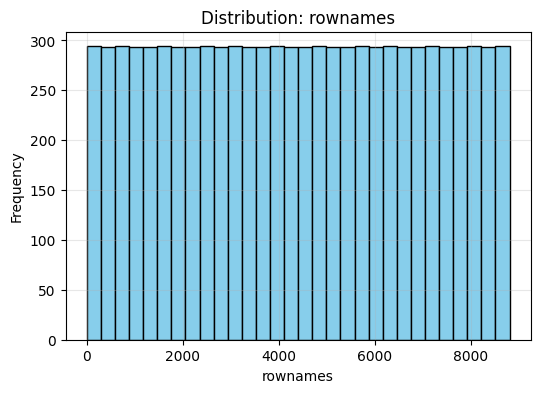

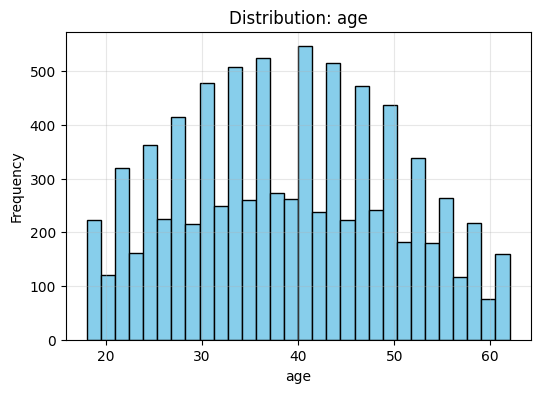

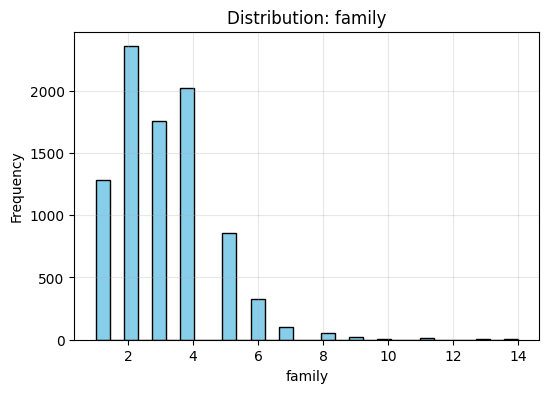

In [7]:
# 1.6. Missing values
print(df.isnull().sum())

# 1.7. Distribution plots (example numeric columns)
import matplotlib.pyplot as plt
import numpy as np

numeric_cols = df.select_dtypes(include=np.number).columns[:3]
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(alpha=0.3)
    plt.show()


# Task II — Baseline Synthetic Data

In [8]:
# 2.1 Random noise baseline
synthetic_baseline = pd.DataFrame(
    np.random.randn(df.shape[0], df.shape[1]),
    columns=df.columns
)
display(synthetic_baseline.head())

,rownames,health,age,limit,gender,insurance,married,selfemp,family,region,ethnicity,education
0,1.066622,-1.682335,0.879976,-0.162389,0.599842,-0.300911,-1.947335,0.337412,0.858261,0.185515,-1.211018,1.848128
1,0.532141,0.528239,0.844530,-0.951568,0.748390,0.113652,0.118547,-1.668715,-0.858101,0.604949,0.751007,0.341841
2,-0.714232,1.397226,-1.422723,-0.469904,1.003771,-0.801328,-1.351771,-1.413052,-0.389028,1.208144,-2.196506,-1.390342
3,2.056863,0.042973,0.662631,0.588174,-0.160994,0.837277,-1.143908,1.194091,0.269019,2.019630,-0.476926,-0.468912
4,-0.153623,0.843265,1.328795,0.365025,0.764539,0.651266,-0.561871,-1.457659,0.409945,1.027028,1.038616,-0.135299


# Task III — Advanced Synthetic Data (SDV)

In [9]:
# 3.1 Infer table metadata (types, constraints, relations)
metadata = Metadata.detect_from_dataframe(data=df, table_name="my_table")

In [10]:
# 3.2 Synthetic Data Generation — GaussianCopula (for SDV ≤ 1.3.x)

from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata
import pandas as pd
import os

# --- Step 1: Create metadata from the dataframe ---
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df)

# Check if metadata file already exists
metadata_path = "metadata.json"
if os.path.exists(metadata_path):
    print(f"Existing {metadata_path} found — overwriting it.")
    os.remove(metadata_path)

# Save metadata for reproducibility
metadata.save_to_json(metadata_path)
print(f"Metadata saved as {metadata_path}")

# --- Step 2: Fit the GaussianCopula model ---
gc = GaussianCopulaSynthesizer(metadata)
gc.fit(df)
print("GaussianCopula model trained successfully!")

# --- Step 3: Generate synthetic data ---
synthetic_gc = gc.sample(num_rows=len(df))
display(synthetic_gc.head())

# --- Step 4: Optional — Save the trained model itself ---
model_path = "gaussian_copula_synth.pkl"
if os.path.exists(model_path):
    print(f"Existing {model_path} found — overwriting it.")
    os.remove(model_path)

gc.save(model_path)
print(f"Model saved as {model_path}")

# --- Step 5 (optional) — Reload later without retraining ---
# gc_loaded = GaussianCopulaSynthesizer.load(model_path)
# synthetic_gc = gc_loaded.sample(num_rows=len(df))


Existing metadata.json found — overwriting it.
Metadata saved as metadata.json


c:\Users\fabio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sdv\single_table\base.py:168: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)


GaussianCopula model trained successfully!


,rownames,health,age,limit,gender,insurance,married,selfemp,family,region,ethnicity,education
0,11478456,yes,42,no,male,yes,yes,no,3,west,cauc,highschool
1,5376530,yes,21,no,female,no,no,no,2,west,cauc,highschool
2,3720715,yes,22,no,male,no,no,no,3,south,afam,highschool
3,13670850,yes,56,no,female,yes,no,no,2,midwest,cauc,highschool
4,7487644,yes,47,no,female,yes,no,no,3,south,cauc,highschool


Existing gaussian_copula_synth.pkl found — overwriting it.
Model saved as gaussian_copula_synth.pkl


In [11]:
# 3.3 CTGAN
ctgan = CTGANSynthesizer(metadata, epochs=200, batch_size=100, verbose=True)
ctgan.fit(df)
synthetic_ctgan = ctgan.sample(num_rows=len(df))
display(synthetic_ctgan.head())

c:\Users\fabio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sdv\single_table\base.py:168: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
Gen. (-2.41) | Discrim. (0.20): 100%|██████████| 200/200 [07:13<00:00,  2.17s/it] 


,rownames,health,age,limit,gender,insurance,married,selfemp,family,region,ethnicity,education
0,11478456,yes,46,yes,male,yes,no,no,5,west,cauc,highschool
1,5376530,no,41,no,male,yes,yes,no,5,south,cauc,bachelor
2,3720715,yes,18,yes,male,no,no,no,1,west,cauc,bachelor
3,13670850,yes,49,no,female,no,yes,yes,3,northeast,cauc,ged
4,7487644,yes,44,no,female,yes,no,no,4,northeast,cauc,master


# Task IV — Evaluation

Convert metadata for sdmetrics (single table)

In [12]:
# Convert metadata for sdmetrics (single table)
_meta_dict = metadata.to_dict()
if "tables" in _meta_dict:
    _table_name = next(iter(_meta_dict["tables"].keys()))
    single_table_meta = _meta_dict["tables"][_table_name]
else:
    single_table_meta = _meta_dict

In [13]:
# 4.1 Quality and Diagnostics
qr_gc = QualityReport(); qr_gc.generate(df, synthetic_gc, single_table_meta)
qr_ct = QualityReport(); qr_ct.generate(df, synthetic_ctgan, single_table_meta)

print("Quality — GC:", qr_gc.get_score())
print("Quality — CTGAN:", qr_ct.get_score())

dr_gc = DiagnosticReport(); dr_gc.generate(df, synthetic_gc, single_table_meta)
dr_ct = DiagnosticReport(); dr_ct.generate(df, synthetic_ctgan, single_table_meta)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 12/12 [00:00<00:00, 221.84it/s]|
Column Shapes Score: 97.49%

(2/2) Evaluating Column Pair Trends: |██████████| 66/66 [00:00<00:00, 177.90it/s]|
Column Pair Trends Score: 94.18%

Overall Score (Average): 95.83%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 12/12 [00:00<00:00, 338.58it/s]|
Column Shapes Score: 87.7%

(2/2) Evaluating Column Pair Trends: |██████████| 66/66 [00:00<00:00, 213.61it/s]|
Column Pair Trends Score: 78.44%

Overall Score (Average): 83.07%

Quality — GC: 0.9583293302618436
Quality — CTGAN: 0.8307206224142647
Generating report ...

(1/2) Evaluating Data Validity: |██████████| 12/12 [00:00<00:00, 718.50it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 135.40it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 12/12 [00:00<00:00, 717.49it/s]|
D

In [14]:
# 4.2 Correlation Preservation
def corr_rmse(a, b):
    cols = a.select_dtypes(include=np.number).columns.intersection(
        b.select_dtypes(include=np.number).columns
    )
    if len(cols) < 2:
        return np.nan
    ca, cb = a[cols].corr(), b[cols].corr()
    mask = np.triu(np.ones_like(ca, dtype=bool), k=1)
    diff = (ca - cb).where(mask)
    vals = diff.values[~np.isnan(diff.values)]
    return np.sqrt(np.mean(vals**2)) if len(vals) else np.nan

print("Correlation RMSE — GC:", corr_rmse(df, synthetic_gc))
print("Correlation RMSE — CTGAN:", corr_rmse(df, synthetic_ctgan))

Correlation RMSE — GC: 0.021453851859544158
Correlation RMSE — CTGAN: 0.1407913481601992


In [15]:
# 4.3 Utility — TSTR (Train on Synthetic, Test on Real)
def tstr_classification(real_df, synth_df, target):
    Xs, ys = synth_df.drop(columns=[target]), synth_df[target]
    Xr, yr = real_df.drop(columns=[target]), real_df[target]
    Xs = Xs.select_dtypes(include=np.number).fillna(Xs.median(numeric_only=True))
    Xr = Xr.select_dtypes(include=np.number).fillna(Xr.median(numeric_only=True))
    clf = RandomForestClassifier(n_estimators=300, random_state=42)
    clf.fit(Xs, ys)
    pred = clf.predict(Xr)
    out = {
        "accuracy": accuracy_score(yr, pred),
        "f1_macro": f1_score(yr, pred, average="macro")
    }
    if len(clf.classes_) == 2:
        out["roc_auc"] = roc_auc_score(yr, clf.predict_proba(Xr)[:, 1])
    return out

def tstr_regression(real_df, synth_df, target):
    Xs, ys = synth_df.drop(columns=[target]), synth_df[target]
    Xr, yr = real_df.drop(columns=[target]), real_df[target]
    Xs = Xs.select_dtypes(include=np.number).fillna(Xs.median(numeric_only=True))
    Xr = Xr.select_dtypes(include=np.number).fillna(Xr.median(numeric_only=True))
    reg = RandomForestRegressor(n_estimators=400, random_state=42)
    reg.fit(Xs, ys)
    pred = reg.predict(Xr)
    return {"r2": r2_score(yr, pred), "mae": mean_absolute_error(yr, pred)}

# Example (uncomment and set target column)
# print(tstr_classification(df, synthetic_gc, "your_target"))
# print(tstr_classification(df, synthetic_ctgan, "your_target"))

In [16]:
# 4.4 Privacy — exact duplicates
def exact_dup_rate(real_df, synth_df):
    r = real_df.astype(str).agg("|".join, axis=1)
    s = synth_df.astype(str).agg("|".join, axis=1)
    return len(set(r) & set(s)) / max(1, len(s))

print("Duplication rate — GC:", exact_dup_rate(df, synthetic_gc))
print("Duplication rate — CTGAN:", exact_dup_rate(df, synthetic_ctgan))

Duplication rate — GC: 0.0
Duplication rate — CTGAN: 0.0


## # Refined BC2 Content for Jupyter Notebook

### BC2.I - HDFS and PySpark Setup

In [17]:
# Imports (Ensure all necessary PySpark and system imports are here)
import os, time
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from py4j.java_gateway import java_import

# ------------------------------------------------------------------

**Objective**

Initialize Spark and verify HDFS connectivity for Big Data processing.

**Execution**

Configure the environment variables and create a SparkSession

In [18]:
try:
    spark.stop()
except:
    pass
os.environ["HADOOP_USER_NAME"] = "hadoop"
time.sleep(1) # Allow time for environment variable to set


NN_HOST = "hadoop-VirtualBox"
NN_PORT = "9000"
HDFS_URI = f"hdfs://{NN_HOST}:{NN_PORT}"
DATA_DIR = "/data/tlc/trips"
HDFS_PARQUET = f"{DATA_DIR}/yellow_tripdata_2023-05.parquet"
CSV_BASE_DIR = "/user/hadoop/taxi"


spark = (SparkSession.builder
         .appName("BC2_AdvancedDataAnalytics")
         .config("spark.hadoop.fs.defaultFS", HDFS_URI)
         .getOrCreate())

sc = spark.sparkContext


print("Using HDFS URI:", HDFS_URI)
print("fs.defaultFS =", spark._jsc.hadoopConfiguration().get("fs.defaultFS"))
ugi = spark._jvm.org.apache.hadoop.security.UserGroupInformation.getCurrentUser().getShortUserName()
print("HDFS effective user:", ugi)

Using HDFS URI: hdfs://hadoop-VirtualBox:9000
fs.defaultFS = hdfs://hadoop-VirtualBox:9000
HDFS effective user: hadoop


**Justification**

This setup is critical for all subsequent tasks, establishing the

**Objective**

Load the NYC Taxi Trip dataset from HDFS.

**Execution**

Read the Parquet file directly from the HDFS path. (this execution may take few minutes - be patient!)

In [19]:
df = spark.read.parquet(HDFS_PARQUET)

**Justification**

Parquet is an optimized columnar format suitable for

**Objective**

Perform initial PySpark data inspection.

**Execution**

Display schema, row count, and basic descriptive statistics.

In [20]:
print("--- Schema and Row Count ---")
df.printSchema()
print(f"Total Records: {df.count():,}")

print("\n--- Basic Statistics (Fare and Distance) ---")
df.select("fare_amount", "trip_distance", "passenger_count").describe().show()

--- Schema and Row Count ---
root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)

Total Records: 3,513,649

--- Basic Statistics (Fare and Distance) ---
+-------+----------------

**Justification**

Initial inspection confirms data integrity, schema correctness,

**Objective**

Prepare a minimal CSV file for the MapReduce task.

**Execution**

Select only 'PULocationID' and 'fare_amount', filter out nulls,

In [21]:
OUT_DIR  = f"{HDFS_URI}{CSV_BASE_DIR}/yellow_2023-05_mincsv"

min_df = (df
    .select("PULocationID", "fare_amount")
    .where(F.col("PULocationID").isNotNull() & F.col("fare_amount").isNotNull())
)

(min_df.coalesce(1)
      .write.mode("overwrite")
      .option("header", "false")
      .csv(OUT_DIR))

print(f" Minimal CSV for MapReduce written to: {OUT_DIR}")


preview = (spark.read
    .option("header", "false")
    .csv(OUT_DIR)
    .toDF("PULocationID","fare_amount_raw")
    .select(F.col("PULocationID").cast("int"),
            F.col("fare_amount_raw").cast("double").alias("fare_amount"))
)
print("\nSample of prepared MapReduce input:")
preview.show(5, truncate=False)

 Minimal CSV for MapReduce written to: hdfs://hadoop-VirtualBox:9000/user/hadoop/taxi/yellow_2023-05_mincsv

Sample of prepared MapReduce input:
+------------+-----------+
|PULocationID|fare_amount|
+------------+-----------+
|138         |33.8       |
|138         |35.9       |
|138         |35.2       |
|138         |33.1       |
|138         |31.0       |
+------------+-----------+
only showing top 5 rows



**Justification**

This step fulfills the requirement to prepare data for the

### BC2.II - Hadoop Streaming / MapReduce

In [22]:
# ------------------------------------------------------------------

**Objective**

Define the Python Mapper and Reducer scripts for Hadoop Streaming.

**Execution**

The scripts are defined as multi-line strings and saved to the

In [23]:
mapper_content = r"""#!/usr/bin/env python3
import sys


for line in sys.stdin:
    line = line.strip()
    if not line:
        continue
    
    # Input is a comma-separated line (PULocationID,fare_amount)
    parts = line.split(',')
    if len(parts) < 2:
        continue
        
    pul, fare = parts[0].strip(), parts[1].strip()
    
    try:
        # Ensure fare is a valid number
        f = float(fare)
    except ValueError:
        continue
        
    # Output: PULocationID \t fare_amount
    print(f"{pul}\t{f}")
"""

reducer_content = r"""#!/usr/bin/env python3
import sys
from collections import defaultdict


current_pul = None
current_total_fare = 0.0


for line in sys.stdin:
    line = line.strip()
    if not line:
        continue
    
    try:
        pul, fare_str = line.split('\t', 1)
        fare = float(fare_str)
    except ValueError:
        # Skip bad records
        continue
    
    if current_pul == pul:
        # Accumulate fare for the current key
        current_total_fare += fare
    else:
        if current_pul:
            # Output the result for the previous key
            print(f"{current_pul}\t{current_total_fare}")
        
        # Start new key
        current_pul = pul
        current_total_fare = fare


if current_pul:
    print(f"{current_pul}\t{current_total_fare}")
"""


with open("mapper.py", "w", encoding="utf-8") as f:
    f.write(mapper_content)
with open("reducer.py", "w", encoding="utf-8") as f:
    f.write(reducer_content)

print("mapper.py and reducer.py saved locally for transfer to the Hadoop VM.")

mapper.py and reducer.py saved locally for transfer to the Hadoop VM.


**Justification**

The MapReduce paradigm is a foundational concept in Big Data.

**Objective**

Provide the execution command and discuss limitations.

**Execution**

The following command is executed on the Hadoop VM's shell.

In [24]:
print("\n--- Hadoop Streaming Execution Command (Run on Hadoop VM) ---")
print(f"""
# 1. Transfer scripts to the Hadoop VM
# scp mapper.py reducer.py hadoop@hadoop-VirtualBox:~/

# 2. Execute the MapReduce job via Hadoop Streaming
# Note: The input is the single-shard CSV created in BC2.I
hdfs dfs -cat {CSV_BASE_DIR}/yellow_2023-05_mincsv/part-* | \\
  python3 mapper.py | sort | python3 reducer.py > total_fare_by_pu.txt

# 3. View a partial output
# head total_fare_by_pu.txt
""")


--- Hadoop Streaming Execution Command (Run on Hadoop VM) ---

# 1. Transfer scripts to the Hadoop VM
# scp mapper.py reducer.py hadoop@hadoop-VirtualBox:~/

# 2. Execute the MapReduce job via Hadoop Streaming
# Note: The input is the single-shard CSV created in BC2.I
hdfs dfs -cat /user/hadoop/taxi/yellow_2023-05_mincsv/part-* | \
  python3 mapper.py | sort | python3 reducer.py > total_fare_by_pu.txt

# 3. View a partial output
# head total_fare_by_pu.txt



**Justification**

# The MapReduce model requires explicit sorting and grouping, which is

### BC2.III - Frequent Pattern Mining (FPGrowth)

In [25]:
# ------------------------------------------------------------------

**Objective**

Identify frequent travel patterns using the FPGrowth algorithm.

**Execution**

Create "baskets" of categorical items (PU and DO Location IDs)

In [26]:
from pyspark.ml.fpm import FPGrowth
from pyspark.sql.functions import col, lit




baskets_df = df.select(
    col("PULocationID").cast("string").alias("PU"),
    col("DOLocationID").cast("string").alias("DO")
).where(col("PU") != col("DO"))


baskets_df = baskets_df.withColumn("items", F.array("PU", "DO")).select("items")
print(f"Total valid trips for FPGrowth: {baskets_df.count():,}")



fp_model = FPGrowth(itemsCol="items", minSupport=0.005, minConfidence=0.5).fit(baskets_df)


print("\n--- Top 10 Frequent Itemsets (Travel Pairs) ---")
fp_model.freqItemsets.sort(col("freq").desc()).limit(10).show(truncate=False)


print("\n--- Top 10 Association Rules (Travel Flow) ---")
rules = fp_model.associationRules.sort(col("confidence").desc(), col("lift").desc()).limit(10)
rules.show(truncate=False)

Total valid trips for FPGrowth: 3,317,060

--- Top 10 Frequent Itemsets (Travel Pairs) ---
+-----+------+
|items|freq  |
+-----+------+
|[237]|295042|
|[161]|284959|
|[236]|280498|
|[142]|213921|
|[162]|212060|
|[132]|210459|
|[230]|208936|
|[170]|197363|
|[163]|186855|
|[239]|185558|
+-----+------+


--- Top 10 Association Rules (Travel Flow) ---
+----------+----------+----------+----+-------+
|antecedent|consequent|confidence|lift|support|
+----------+----------+----------+----+-------+
+----------+----------+----------+----+-------+



**Justification**

FPGrowth efficiently mines the large dataset for non-trivial

**Objective**

Interpret the FPGrowth results as urban mobility insights.

### BC2.IV - Rider Segmentation (K-Means Clustering)

In [27]:
# ------------------------------------------------------------------

**Objective**

Segment taxi trips based on key ride characteristics using K-Means.

**Execution**

Use PySpark MLlib's VectorAssembler and StandardScaler to prepare

In [28]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.sql.functions import hour



df_clust = df.withColumn("pickup_hour", hour(col("tpep_pickup_datetime")))


features = ["trip_distance", "fare_amount", "pickup_hour", "passenger_count"]
df_clust = df_clust.select(*features).na.drop()
print(f"Records for Clustering: {df_clust.count():,}")


assembler = VectorAssembler(inputCols=features, outputCol="features_raw")
df_clust = assembler.transform(df_clust)


scaler = StandardScaler(inputCol="features_raw", outputCol="features", withStd=True, withMean=False)
scaler_model = scaler.fit(df_clust)
df_clust = scaler_model.transform(df_clust)



kmeans = KMeans(featuresCol="features", k=3, seed=42)
kmeans_model = kmeans.fit(df_clust)


centers = kmeans_model.clusterCenters()
df_clust = kmeans_model.transform(df_clust)






cluster_analysis = df_clust.groupBy("prediction").agg(
    F.mean("trip_distance").alias("avg_distance"),
    F.mean("fare_amount").alias("avg_fare"),
    F.mean("pickup_hour").alias("avg_hour"),
    F.count("*").alias("count")
).sort("prediction")

print("\n--- K-Means Cluster Analysis (Mean of Original Features) ---")
cluster_analysis.show()

Records for Clustering: 3,411,853

--- K-Means Cluster Analysis (Mean of Original Features) ---
+----------+-----------------+------------------+------------------+-------+
|prediction|     avg_distance|          avg_fare|          avg_hour|  count|
+----------+-----------------+------------------+------------------+-------+
|         0|3.339357349715017|18.877482241965797| 8.544419208254975|1264498|
|         1|3.599065556347686|20.176887209884228|18.215740260206502|1894111|
|         2|5.002803383298306| 21.14213446320514|15.093850199807301| 253244|
+----------+-----------------+------------------+------------------+-------+



**Justification**

K-Means is an effective method for unsupervised segmentation.

**Objective**

Interpret the cluster centers as rider personas and suggest implications.

### Business Insight & Reporting

In [29]:
# ------------------------------------------------------------------

**Objective**

Summarize how Big Data mining supports strategic decisions.

**Summary**

# The analysis of NYC taxi data using PySpark and Hadoop provides actionable

The analysis of NYC taxi data using PySpark and Hadoop provides actionable, prescriptive insights that guide where, when, and how to operate. MapReduce identifies zones and time windows with the highest demand and revenue, enabling the company to optimize driver allocation and shift scheduling for maximum coverage and profitability. FPGrowth reveals repeatable travel patterns — for instance, frequent evening trips from downtown to the airport — which supports proactive car positioning, dynamic pricing, and targeted promotions that match predicted passenger flows.

K-Means clustering segments trips into operational profiles such as short urban rides, airport transfers, and family trips, allowing management to design specific service strategies for each segment (e.g., shared rides, premium flat-rate transfers, family-friendly vehicles). Together, these models not only describe what has happened but also prescribe what to do next — where to send drivers, which routes to prioritize, and how to adapt pricing in real time. In practice, this translates into higher efficiency, shorter wait times, and stronger margins, turning large-scale data mining into a true decision engine for strategic advantage